In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from opti import rk2_heun, euler, rk2_ralston, rk4, adam_bashforth

In [2]:
# lam = 2000
# n = 2
# fix_point_ = np.array([0, 0])
# # fix_point_ = np.zeros(2)

# A = lam*np.eye(n)
# A = np.array([[lam, 0],[0, 1e-2]])
# # A[1,1] = 0
# # for i in range(4,15):
# #     A[i,i] = 600
# # A[2,2] = 15

# def f(x, A=A):
#     return 0.5*(x - fix_point_).dot(A.dot(x - fix_point_))

# def df(x, A=A):
#     return A.dot((x - fix_point_))

# t_max = 1500
# h = 2/lam

# init_x = 10*np.ones(n)

# x_1  = init_x
# x_2 = init_x

# x_rk2 = [x_1]
# x_euler = [x_2]

# f_rk2 = [f(x_1)]
# f_euler = [f(x_2)]

In [3]:
# name = 'rk2_heun'
# name = 'adam'
# name = 'rk4'
# for i in range(t_max):
# #     x_1 = adam_bashforth(x_1, df, h, x_rk2[-1])
# #     x_1 = rk2_heun(x_1, df, h)
#     x_1 = rk4(x_1, df, h)

#     x_rk2.append(x_1)
#     f_rk2.append(f(x_1))

#     x_2 = euler(x_2, df, h)    
#     x_euler.append(x_2)
#     f_euler.append(f(x_2))
    
# t_opti = np.linspace(0, t_max, len(x_rk2))


In [4]:
# print(np.array(x_rk2)[-1])
# print(np.array(x_euler)[-1])


In [5]:
# # plt.plot(t_opti, f_rk2, label=name)
# # plt.plot(t_opti, f_euler, label='euler')
# # plt.plot(t, f_exact, label='exact')

# x_rk2 = np.array(x_rk2); x_euler = np.array(x_euler)
# plt.plot(x_rk2[:,0], x_rk2[:,1],label='rk2')
# plt.plot(x_euler[:,0], x_euler[:,1], label='euler')


# plt.legend(loc='lower right')
# plt.show()

In [6]:
# print(x_rk2)
# print(x_euler)

In [7]:
# def rate_conv(x_seq, fix_point=fix_point_):    
#     dum = []
#     for i in range(len(x_seq)):
#         dum.append(np.log10(np.linalg.norm(x_seq[i] - fix_point + 1e-10,2)))
#     return dum

# rk2_conv = rate_conv(x_rk2)
# euler_conv = rate_conv(x_euler)

# # tt = np.log(np.arange(1, len(rk2_conv) + 1))
# tt = np.arange(1, len(rk2_conv) + 1)

# plt.plot(tt, rk2_conv, label=name)
# plt.plot(tt, euler_conv, label='euler')
# # plt.plot(tt, exact_conv, label='exact')
# plt.legend(loc='upper right')
# plt.show()

In [8]:
# max(np.array(rk2_conv) - np.array(euler_conv))

In [9]:
import matplotlib.pyplot as plt
import autograd.numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from autograd import elementwise_grad, value_and_grad
from scipy.optimize import minimize
from collections import defaultdict
from itertools import zip_longest
from functools import partial

f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

func = value_and_grad(lambda args: f(*args))

def df(z):
    x,y = z
    c1 = 2*(1.5 - x + x*y)*(y-1)+ 2*(2.25 - x + x*y**2)*(y**2 - 1) + 2*(2.625 - x + x*(y**3))*(y**3 - 1)
    c2 = 2*(1.5 - x + x*y)*(x)+ 2*(2.25 - x + x*(y**2))*(2*x*y) + 2*(2.625 - x + x*(y**3))*(3*x*(y**2))
    return np.array([c1,c2])


In [10]:
def make_minimize_cb(path=[]):
    def minimize_cb(xk):
        path.append(np.copy(xk))
    return minimize_cb
# path.shape


In [11]:
x_init = np.array([3.,3.5])

x0 = x_init.copy()
x1 = x_init.copy()
x2 = x_init.copy()
x3 = x_init.copy()


path_ = [x0.copy()]
res = minimize(func, x0=x0, method='L-BFGS-B',jac=True, tol=1e-20, callback=make_minimize_cb(path_))

path = np.array(path_).T

n = 10000
# path_rk4 = rk4(x1, df, 1e-5, n).T
path_rk2 = rk2_heun(x2, df, 1e-4, n).T
path_euler = euler(x3, df, 1e-4, n).T

# print('rk4',path_rk4[:,-1])
print('GD',path_euler[:,-1])
print('rk2',path_rk2[:,-1])
print('CG',path[:,-1], path.shape[1])

100%|██████████| 10000/10000 [00:00<00:00, 30668.32it/s]

GD [ 2.56802857  0.36959041]
rk2 [ 2.69649587  0.41339228]
CG [ 3.   0.5] 28


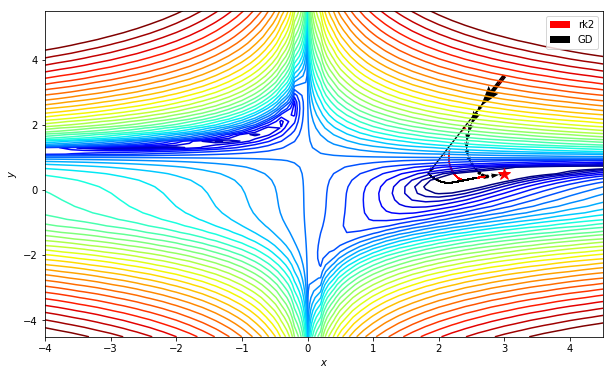

In [12]:
xmin, xmax, xstep = -4, 4.5, .2
ymin, ymax, ystep = -4.5, 5.5, .2

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f(x, y)
minima = np.array([3., .5])
minima_ = minima.reshape(-1, 1)

fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
ax.quiver(path_rk2[0,:-1], path_rk2[1,:-1], path_rk2[0,1:]-path_rk2[0,:-1], path_rk2[1,1:]-path_rk2[1,:-1], scale_units='xy', angles='xy', scale=5, color='r', label='rk2')
# ax.quiver(path_rk4[0,:-1], path_rk4[1,:-1], path_rk4[0,1:]-path_rk4[0,:-1], path_rk4[1,1:]-path_rk4[1,:-1], scale_units='xy', angles='xy', scale=1, color='g', label='rk4')
ax.quiver(path_euler[0,:-1], path_euler[1,:-1], path_euler[0,1:]-path_euler[0,:-1], path_euler[1,1:]-path_euler[1,:-1], scale_units='xy', angles='xy', scale=1, color='k', label='GD')

ax.plot(*minima_, 'r*', markersize=12)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc='upper right')
ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))
plt.show()

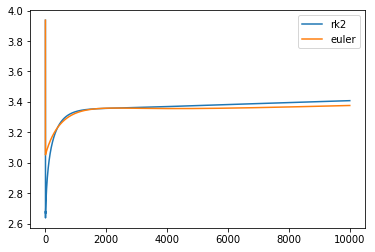

In [13]:
def rate(x, min_):
    k = x.shape[1]
    conv = np.zeros(k)
    f_ = np.zeros(k)
    for i in range(k):
        conv[i] = np.linalg.norm(x[:,i] - min_)
        f_[i] = f(*x[:,i]) - f(*min_)
    return f_, conv

f_rk2, rate_rk2 = (rate(path_rk2, minima_))
f_euler, rate_euler = (rate(path_euler, minima_))

plt.plot(np.arange(len(rate_rk2)),rate_rk2, label='rk2')
plt.plot(np.arange(len(rate_euler)),rate_euler, label='euler')
plt.legend(loc='upper right')
plt.show()

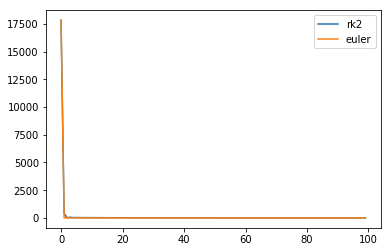

In [14]:
plt.plot(np.arange(len(rate_rk2[:100])),f_rk2[:100], label='rk2')
plt.plot(np.arange(len(rate_euler[:100])),f_euler[:100], label='euler')
plt.legend(loc='upper right')
plt.show()

In [15]:
# fig = plt.figure(figsize=(8, 5))
# ax = plt.axes(projection='3d', elev=50, azim=-50)

# path_rk2=path_rk2[:,45000:]

# ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
# # ax.quiver(path_rk2[0,:-1], path_rk2[1,:-1], f(*path_rk2[::,:-1]), 
# #           path_rk2[0,1:]-path_rk2[0,:-1], path_rk2[1,1:]-path_rk2[1,:-1], f(*(path_rk2[::,1:]-path_rk2[::,:-1])), 
# #           color='k')
# ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

# ax.set_xlabel('$x$')
# ax.set_ylabel('$y$')
# ax.set_zlabel('$z$')

# ax.set_xlim((xmin, xmax))
# ax.set_ylim((ymin, ymax))
# plt.show()

In [16]:
path_rk2[:].shape

(2, 10001)